In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
%matplotlib inline

In [8]:
PATH = '/home/adnrii/Desktop/names/' 
COLS = ['Name','Gender','Count']

## 1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

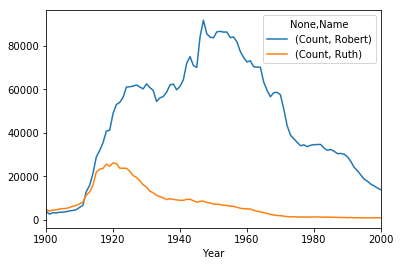

In [5]:
names_by_year = {}
for y in range(1900, 2001):
    names_by_year[y] = pd.read_csv(PATH+'yob{}.txt'.format(y),names=COLS)
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics_cols = (names_all.groupby([names_all.index.get_level_values(0),'Name']).sum().query('Name == ["Ruth", "Robert"]').unstack('Name')).plot()                                                                                              

## 2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

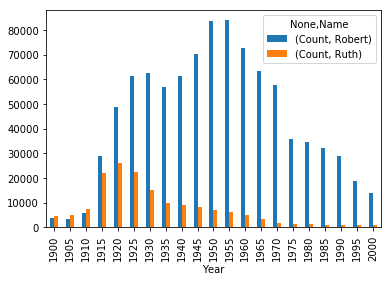

In [6]:
names_by_year = {}
for y in range(1900, 2001, 5):
    names_by_year[y] = pd.read_csv(PATH+'yob{}.txt'.format(y),names=COLS)
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
name_dynamics_cols = (names_all.groupby([names_all.index.get_level_values(0),'Name']).sum().query('Name == ["Ruth", "Robert"]').unstack('Name')).plot.bar()

## 3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

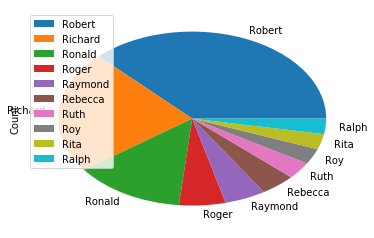

In [83]:
names = pd.read_csv(PATH+'yob{}.txt'.format(1950),names=['Name','Gender','Count'])
names[names.Name.str.contains("^R")].groupby('Name').sum().sort_values(by='Count', ascending=False).head(10).plot.pie(y='Count')

## 4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

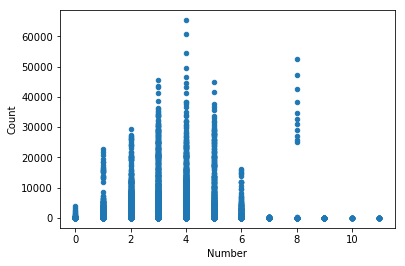

In [9]:
names = pd.concat((pd.read_csv(PATH+'yob'+str(year)+'.txt', names=['Name','Gender','Count']) for year in range(1990, 2001)))
consonant = 'bcdfghjlmnpqrstvwx'
names['Number'] = names.apply(lambda row: len([char for char in row.Name if char.lower() in consonant]), axis=1)
names.plot.scatter(x='Number', y='Count')